In [4]:
import streamlit as st
import pandas as pd
import numpy as np
# import shap
# from sklearn import datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("04_BonstonHousingData.csv")
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
103,0.21161,0.0,8.56,0.0,0.520,6.137,NaN,2.7147,5,384,20.9,394.47,13.44,19.3
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
196,NaN,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3


In [6]:
df.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### First tried by filling  NaN with mean but resulted in low accuracy so ingnore this cell and drop NaN

In [7]:
# filling na with respective mean

# def fill_mean(col):
#     global df
#     mean = np.mean(df[col])
#     df[col] = df[col].fillna(mean)
# fill_mean("CRIM") 
# fill_mean("ZN") 
# fill_mean("LSTAT") 
# fill_mean("INDUS") 
# fill_mean("CHAS") 
# fill_mean("AGE") 

In [8]:
df = df.dropna()
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.shape

(394, 14)

In [10]:
len(df.columns)

14

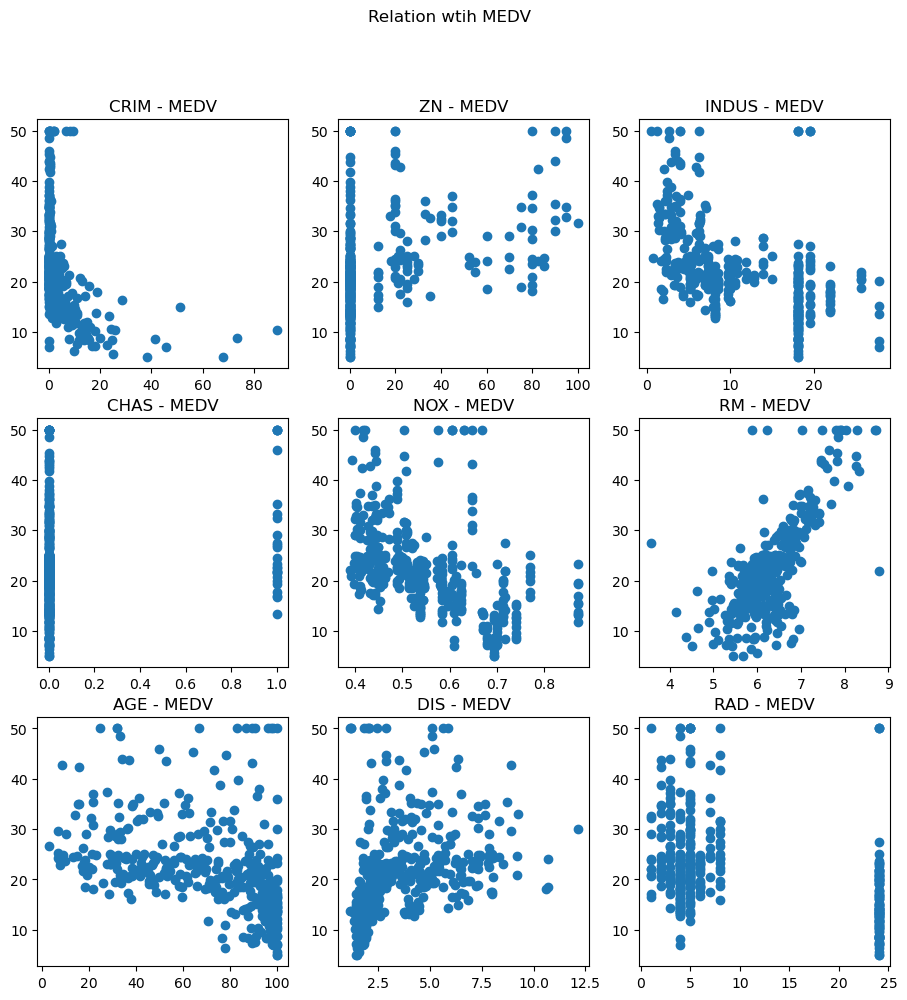

In [11]:
columns_list = df.columns
fig,ax = plt.subplots(3,3)
fig.suptitle('Relation wtih MEDV')
fig.set_figheight(11)
fig.set_figwidth(11)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].set_title(f"{columns_list[k]} - MEDV")
        ax[i,j].scatter(df[columns_list[k]],df["MEDV"])
        k=k+1

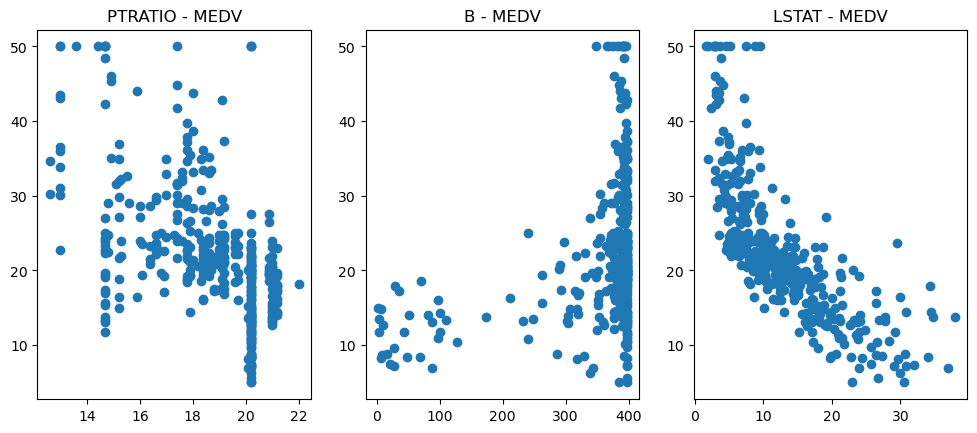

In [12]:
fig,ax = plt.subplots(1,3)
fig.set_figwidth(12)
for i,col in enumerate(["PTRATIO","B" ,"LSTAT"]):
    ax[i].set_title(f"{col} - MEDV")
    ax[i].scatter(df[col],df["MEDV"])

**SO FROM ABOVE CHARTS**
* We can see **CRIM, INDUS, RM, AGE, DIS, B, LSTAT** HAS SOME RELATION WITH MEDV
So we will consisder them as feature for training the model

In [13]:
# x = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']]
x = df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']]
y = df["MEDV"]
x

,CRIM,INDUS,RM,AGE,DIS,B,LSTAT
0,0.00632,2.31,6.575,65.2,4.0900,396.90,4.98
1,0.02731,7.07,6.421,78.9,4.9671,396.90,9.14
2,0.02729,7.07,7.185,61.1,4.9671,392.83,4.03
3,0.03237,2.18,6.998,45.8,6.0622,394.63,2.94
5,0.02985,2.18,6.430,58.7,6.0622,394.12,5.21
...,...,...,...,...,...,...,...
499,0.17783,9.69,5.569,73.5,2.3999,395.77,15.10
500,0.22438,9.69,6.027,79.7,2.4982,396.90,14.33
502,0.04527,11.93,6.120,76.7,2.2875,396.90,9.08
503,0.06076,11.93,6.976,91.0,2.1675,396.90,5.64


In [14]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape,x_test.shape)

(315, 7) (79, 7)


In [15]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7683826371382751

In [16]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.8737681692216129

In [17]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.6445886053308113

In [18]:
import pickle
with open("bonston_model.pkl",'wb') as f:
    pickle.dump(rfr,f)